In [1]:
from torchvision.models.resnet import resnet34
from torchvision.models.vgg import vgg13

In [2]:
vggNet=vgg13(pretrained=True)
model34=resnet34(pretrained=True)

In [3]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline

In [235]:
img=io.imread('demo_5.jpg')

(-0.5, 677.5, 903.5, -0.5)

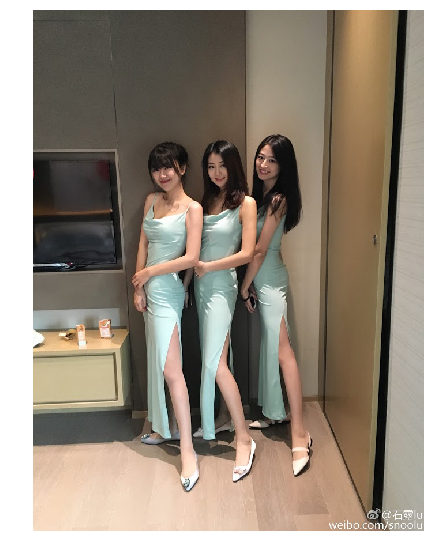

In [236]:
fig=plt.figure(figsize=(7,13))
plt.imshow(img)
plt.axis('off')


In [237]:
import torch
import torchvision.transforms as T
print(img.shape)
trsfm=T.ToTensor()
img1=io.imread('demo_3.jpg')
img2=io.imread('demo_4.jpg')
# img=io.imread('demo_4.jpg')


x=trsfm(img).unsqueeze(0)
print(x.shape)
# y=vggNet(x)

(904, 678, 3)
torch.Size([1, 3, 904, 678])


In [238]:
USE_GPU=True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

device=torch.device('cuda')
print(device)

cuda


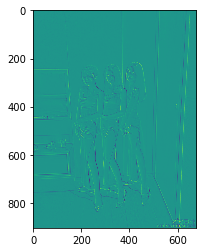

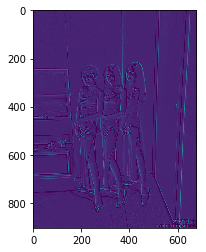

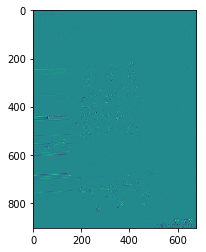

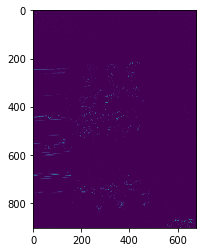

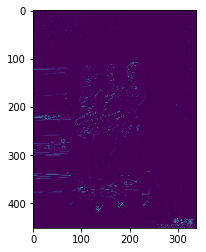

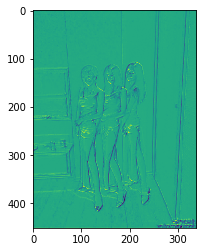

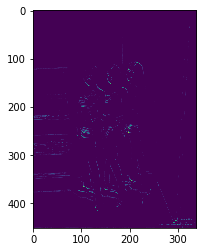

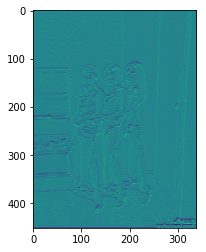

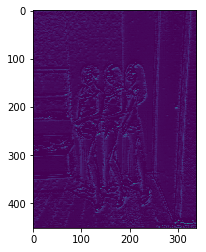

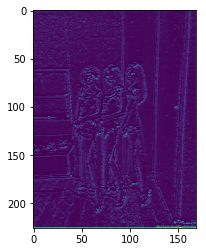

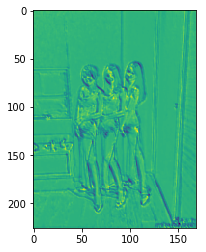

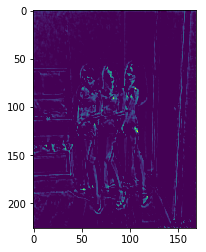

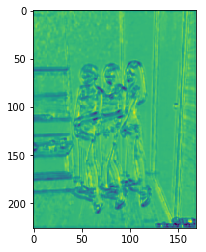

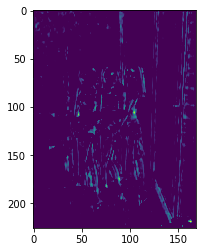

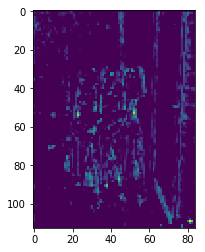

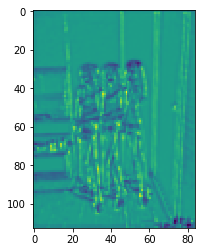

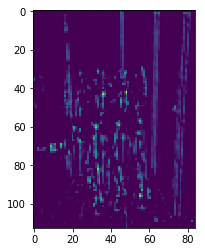

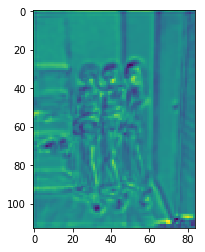

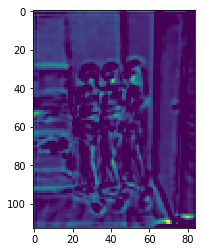

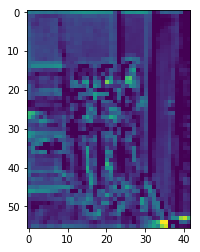

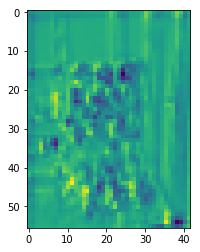

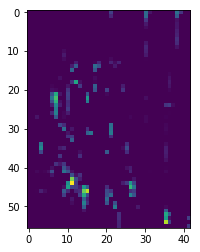

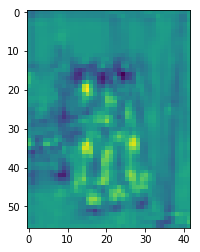

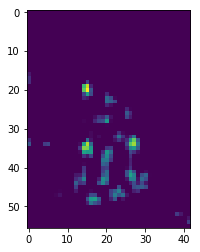

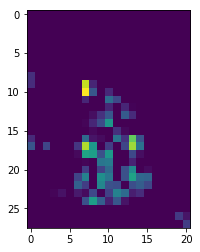

In [239]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

dtype=torch.float
vNet=vggNet.features
# feature=model34.to(device)
x=trsfm(img).unsqueeze(0)
x=x.to(dtype=dtype,device=device)
# # vggNet=vggNet.cuda()
vNet.cuda(device=device)

import torch.nn as nn
model=nn.Sequential(nn.Conv2d(512,1,kernel_size=(1, 1), stride=(1, 1), padding=0))
model=model.to(device)
dtype=torch.float
device=torch.device('cuda')
x=x.to(dtype=dtype,device=device)
# y=model(y)

out=[]
for l in vNet:
    x=l(x)
    out.append(x)
    t=x.shape[1]
    dtype=torch.float
    device=torch.device('cuda')
    x=x.to(dtype=dtype,device=device)
    fig=plt.figure(figsize=(4,4))
    plt.imshow(x[0][0].squeeze().detach().cpu().numpy())
# y=vNet(x)



# print(model34)
# modulelist = list(model34.modules())
# # mlist=list(modulelist[0].modules())
# cnt=0
# for l in modulelist[:2]:
#     cnt+=1
#     print(cnt)
#     print(l)
    
#     x = l(x)
# keep = x


In [240]:
print(len(out))
print(out[24].shape)

25
torch.Size([1, 512, 28, 21])


In [241]:
from skimage.transform import rescale
def imshow_filter(sample,img,thres=0.0):
    h,w=sample.shape
    hi,wi,_=img.shape
    scale=int(hi/h)
    s=(sample>thres)*sample
    s=s/np.max(s)
#     s=s.astype(np.float32)
    m=rescale(s, (scale,scale))
    crop_w=int(w*scale)
    crop_h=int(h*scale)
    img=img[0:crop_h,0:crop_w,:]
#     m=m[:,:,np.newaxis]
    t=np.zeros_like(img)
    for i in range(3):
        t[:,:,i]=(img[:,:,i]*m).astype(np.int32)
    return t


In [242]:
n=24
print(out[n].shape)

torch.Size([1, 512, 28, 21])


In [243]:

sample=out[n].squeeze().detach().cpu().numpy()

# print(axes.shape)
# for i in range(64):
#     fig, axes=plt.subplots(1,8,figsize=(20,40))
#     for j in range(8):
        
#         axes[j].imshow(imshow_filter(sample[i*8+j],img))
#         axes[j].axis('off')
#         axes[j].set_title(str(i*8+j))
#     plt.tight_layout(h_pad=0.01, w_pad=0.01)
#     fig.show()


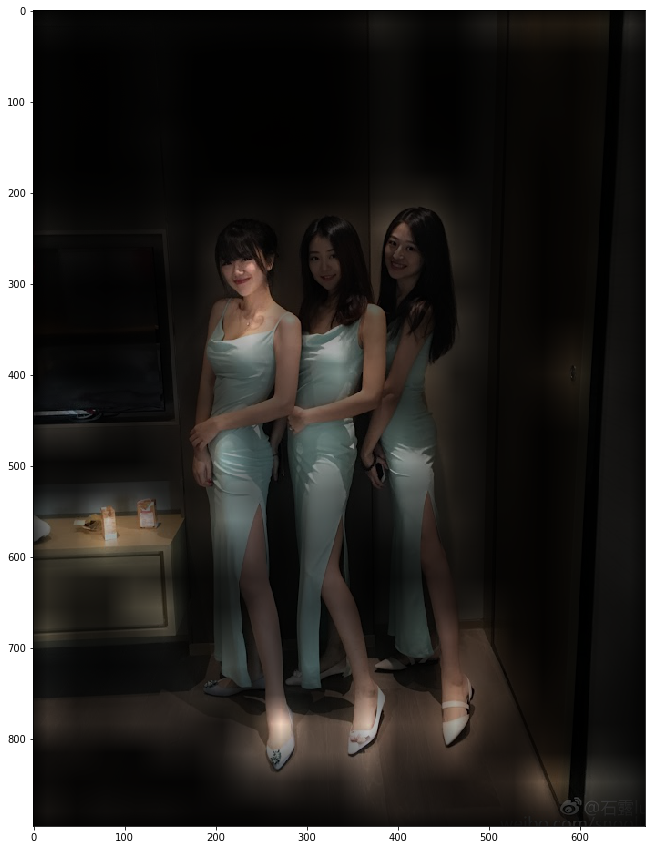

In [244]:

plt.figure(figsize=(15,15))
f=sample.sum(axis=0)
# sample[75]+sample[107]+sample[365]+sample[394]+sample[235]+sample[187]+sample[155]+sample[116]
plt.imshow(imshow_filter(f,img))

In [245]:
import torch.nn.functional as F
# model=nn.Sequential(nn.Conv2d(3,1,kernel_size=(3,3),padding=0))
x=trsfm(img).unsqueeze(0)

dtype=torch.float
device=torch.device('cuda')
x=x.to(dtype=dtype,device=device)
x.requires_grad_()
vNet.cuda()
score=vNet(x)

# loss=F.smooth_l1_loss(score,torch.zeros_like(score))
# print(score.shape)

In [173]:
# y=score.clone()
y=torch.zeros_like(score)
y[0][107]=torch.ones_like(score[0][107])
# y=
# loss=score-y
# print(loss[0][137])
score.backward(y)

In [174]:
# print(x)

In [175]:
i=x.grad.squeeze().detach().cpu().numpy().transpose(1,2,0)
# print(i)

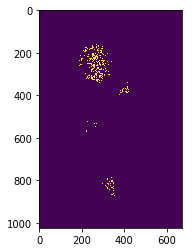

In [192]:
from skimage.color import rgb2grey
g_img=i*img
g_img=g_img/np.max(g_img)
new_gimg=rgb2grey(g_img)
new_gimg=new_gimg/np.max(new_gimg)
# print(new_gimg[200:400,200:400])
plt.imshow(np.ones_like(new_gimg)*(new_gimg>0.05))

# plt.imshow(new_gimg*(new_gimg>0))
# plt.imshow(rgb2grey((i/np.max(i)*img).astype(np.int32)))
# print(i.shape)

## import torch.nn as nn
model=nn.Sequential(nn.Conv2d(512,1,kernel_size=(1, 1), stride=(1, 1), padding=0))
model=model.to(device)
dtype=torch.float
device=torch.device('cuda')
x=x.to(dtype=dtype,device=device)
y=model(y)

In [ ]:

# type(x)


In [ ]:
print(y.shape)

In [ ]:
plt.imshow(y.squeeze().detach().cpu().numpy())

In [ ]:
m=y.detach().cpu().numpy()

In [ ]:
print(m.shape)